In [2]:
#read evolution in file E= кВ/см
import numpy as np
F='80'
f1 = open('CntRenN'+F+'.txt')
f2 = open('CntImnN'+F+'.txt')
f3 = open('CoefficientsRe.txt')
f4 = open('CoefficientsIm.txt')
fileEn = open("continuum_states.txt")
tn=2500
N=2078
ystep=1500

CncoefRe = []
CncoefIm = []
for i in range(N):
    CncoefRe.append([])
    CncoefIm.append([])
    CncoefRe[i].append(f3.readline())
    CncoefRe[i].append(f3.readline())
    CncoefRe[i].append(f3.readline())
    CncoefRe[i].append(f3.readline())
    CncoefRe[i].append(f3.readline())
    CncoefRe[i].append(f3.readline())
    CncoefIm[i].append(f4.readline())
    CncoefIm[i].append(f4.readline())
    CncoefIm[i].append(f4.readline())
    CncoefIm[i].append(f4.readline())
    CncoefIm[i].append(f4.readline())
    CncoefIm[i].append(f4.readline())
Cncoef = []
for i in range(N):
    Cncoef.append([])
    Cncoef[i].append(complex(CncoefRe[i][0])+1j*complex(CncoefIm[i][0]))
    Cncoef[i].append(complex(CncoefRe[i][1])+1j*complex(CncoefIm[i][1]))
    Cncoef[i].append(complex(CncoefRe[i][2])+1j*complex(CncoefIm[i][2]))
    Cncoef[i].append(complex(CncoefRe[i][3])+1j*complex(CncoefIm[i][3]))
    Cncoef[i].append(complex(CncoefRe[i][4])+1j*complex(CncoefIm[i][4]))
    Cncoef[i].append(complex(CncoefRe[i][5])+1j*complex(CncoefIm[i][5]))
Cncoef = np.asarray(Cncoef, dtype=complex)
f3.close()
f4.close()
CnreadRe=[]
CnreadIm=[]
for i in range(tn):
    CnreadRe.append([])
    CnreadIm.append([])
    for j in range(N):
        CnreadRe[i].append(f1.readline())
        CnreadIm[i].append(f2.readline())
Cn=[]
for i in range(tn):
    Cn.append([])
    for j in range(N):
        Cn[i].append(complex(CnreadRe[i][j])+1j*complex(CnreadIm[i][j]))
Cn = np.asarray(Cn, dtype=complex)
f1.close()
f2.close()
En=[]
for i in range(N):
    En.append(float(fileEn.readline()))
fileEn.close()
En = np.asarray(En, dtype=float)

In [3]:
# ***************************
# solving full wave function
from numba import njit
from tqdm import tqdm
from numpy import sqrt
w=(En[1]-En[0])
T=2.*np.pi/w
dt=T/20.
L=40.
tn=int(125*T/dt)
ystep=121
y = np.linspace(-3.*L/2., 3.*L/2., ystep)
y = np.asarray(y, dtype=float)
C = [0.0]*N
C[0] = 1.0
Cn = []
Cn.append(C)
C = [0.0]*N
C[1] = 1.0
Cn.append(C)
C = np.asarray(C, dtype=complex)
Cn = np.asarray(Cn, dtype=complex)
# for i in range(int((ystep-1)/3.)):
@njit 
def wawefuntionstepy(i,k):
    M1=20.
    M2=20.
    A=0.36*(10 ** 3)
    global y, ystep, Cn, En, Cncoef
    Psi1Sum0 = 0. + 1j*0.
    Psi1Sum1 = 0. + 1j*0.
    Psi2Sum0 = 0. + 1j*0.
    Psi2Sum1 = 0. + 1j*0.
    Psi3Sum0 = 0. + 1j*0.
    Psi3Sum1 = 0. + 1j*0.
    for j in range(N):
        a=En[j]/A
        if j==0 or j==1:
            kdis1 = np.sqrt(M1*M1 - En[j]*En[j])/A
            kdis2 = np.sqrt(M2*M2 - En[j]*En[j])/A
            phidis1 = (-1j*np.sqrt(M1*M1 - En[j]*En[j]) - En[j])/M1
            phidis2 = (1j*np.sqrt(M2*M2 - En[j]*En[j]) - En[j])/M2
            if ((i>=0) and (i<int((ystep-1)/3.))):
                Psi1Sum0 = Psi1Sum0 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*Cncoef[j][2]*np.exp(kdis1*y[i])
                Psi1Sum1 = Psi1Sum1 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*Cncoef[j][2]*phidis1*np.exp(kdis1*y[i])
            if ((i>=int((ystep-1)/3.)) and (i<int(2*(ystep-1)/3.))):
                Psi2Sum0 = Psi2Sum0 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*Cncoef[j][0]*np.exp(1j*a*y[i])
                Psi2Sum1 = Psi2Sum1 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*Cncoef[j][1]*np.exp(-1j*a*y[i])
            if i>=int(2*(ystep-1)/3.):
                Psi3Sum0 = Psi3Sum0 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*Cncoef[j][4]*np.exp(-kdis2*y[i])
                Psi3Sum1 = Psi3Sum1 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*Cncoef[j][4]*phidis2*np.exp(-kdis2*y[i])
        else: 
            Kcont1 = 1j*np.sqrt(En[j]*En[j] - M1*M1)/A
            Kcont2 = 1j*np.sqrt(En[j]*En[j] - M2*M2)/A
            Phicont1 = (-En[j] + np.sqrt(En[j]*En[j] - M1*M1))/M1
            Phicont2 = (-En[j] - np.sqrt(En[j]*En[j] - M1*M1))/M1
            Bcont1 =   (-En[j] + np.sqrt(En[j]*En[j] - M2*M2))/M2
            Bcont2 =   (-En[j] - np.sqrt(En[j]*En[j] - M2*M2))/M2
            if ((i>=0) and (i<int((ystep-1)/3.))):
                Psi1Sum0 = Psi1Sum0 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*(Cncoef[j][2]*np.exp(Kcont1*y[i])+Cncoef[j][3]*np.exp(-Kcont1*y[i]))
                Psi1Sum1 = Psi1Sum1 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*(Cncoef[j][2]*Phicont1*np.exp(Kcont1*y[i])+Cncoef[j][3]*Phicont2*np.exp(-Kcont1*y[i]))
            if ((i>=int((ystep-1)/3.)) and (i<int(2*(ystep-1)/3.))):
                Psi2Sum0 = Psi2Sum0 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*Cncoef[j][0]*np.exp(1j*a*y[i])
                Psi2Sum1 = Psi2Sum1 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*Cncoef[j][1]*np.exp(-1j*a*y[i])
            if i>=int(2*(ystep-1)/3.):
                Psi3Sum0 = Psi3Sum0 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*(Cncoef[j][4]*np.exp(Kcont2*y[i])+Cncoef[j][5]*np.exp(-Kcont2*y[i]))
                Psi3Sum1 = Psi3Sum1 + Cn[k][j]*np.exp(-1j*En[j]*(k)*dt)*(Cncoef[j][4]*Bcont1*np.exp(Kcont2*y[i])+Cncoef[j][5]*Bcont2*np.exp(-Kcont2*y[i]))
    AbsPsi2 = abs((np.conj(Psi1Sum0)*Psi1Sum0+np.conj(Psi1Sum1)*Psi1Sum1)+(np.conj(Psi2Sum0)*Psi2Sum0+np.conj(Psi2Sum1)*Psi2Sum1)+(np.conj(Psi3Sum0)*Psi3Sum0+np.conj(Psi3Sum1)*Psi3Sum1))
    AbsY2 = abs((np.conj(Psi1Sum0)*y[i]*Psi1Sum0+np.conj(Psi1Sum1)*y[i]*Psi1Sum1)+(np.conj(Psi2Sum0)*y[i]*Psi2Sum0+np.conj(Psi2Sum1)*y[i]*Psi2Sum1)+(np.conj(Psi3Sum0)*y[i]*Psi3Sum0+np.conj(Psi3Sum1)*y[i]*Psi3Sum1)) 
    Sx = (np.conj(Psi1Sum0)*Psi1Sum1+np.conj(Psi1Sum1)*Psi1Sum0)+(np.conj(Psi2Sum0)*Psi2Sum1+np.conj(Psi2Sum1)*Psi2Sum0)+(np.conj(Psi3Sum0)*Psi3Sum1+np.conj(Psi3Sum1)*Psi3Sum0)
    Sy = 1j*(-np.conj(Psi1Sum0)*Psi1Sum1+np.conj(Psi1Sum1)*Psi1Sum0)+1j*(-np.conj(Psi2Sum0)*Psi2Sum1+np.conj(Psi2Sum1)*Psi2Sum0)+1j*(-np.conj(Psi3Sum0)*Psi3Sum1+np.conj(Psi3Sum1)*Psi3Sum0)
    Sz = (np.conj(Psi1Sum0)*Psi1Sum0-np.conj(Psi1Sum1)*Psi1Sum1)+(np.conj(Psi2Sum0)*Psi2Sum0-np.conj(Psi2Sum1)*Psi2Sum1)+(np.conj(Psi3Sum0)*Psi3Sum0-np.conj(Psi3Sum1)*Psi3Sum1)
    return [AbsPsi2, AbsY2, Sx.real, Sy.real, Sz.real]
#    return [Psi1Sum, Psi2Sum, Psi3Sum]
# f = open('AbsPsi2.txt', 'w')
PsiFull = []
AbsY2Full = []
SxFull = []
SyFull = []
SzFull = []
tn=2
for k in tqdm(range(tn)):
    PsiFull.append([])
    AbsY2Full.append([])
    SxFull.append([])
    SyFull.append([])
    SzFull.append([])
    for i in range((ystep)):
        A = wawefuntionstepy(i,k)
        PsiFull[k].append(A[0])
        AbsY2Full[k].append(A[1])
        SxFull[k].append(A[2])
        SyFull[k].append(A[3])
        SzFull[k].append(A[4])
# f.write(str(PsiFull[k][i])+ '\n')
# f.close

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.82s/it]


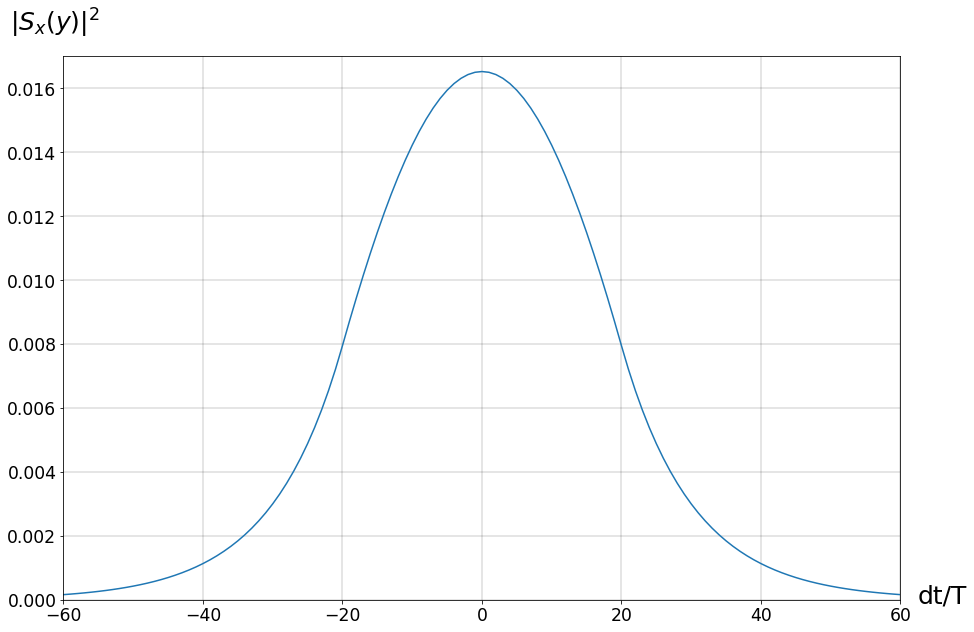

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
SxFull = np.asarray(SxFull, dtype=float)
tlist = np.linspace(0, 124.5, int(tn/20))
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (y, SxFull[0])
ax.set_xlabel('dt/T', rotation=0, fontsize=25, labelpad=20)
ax.set_ylabel('$|S_x(y)|^2$', rotation=0, fontsize=25, labelpad=20)
ax.yaxis.set_label_coords(-0.01, 1.03)
ax.xaxis.set_label_coords(1.05, 0.03)
ax.grid(color='black', linestyle='-', linewidth=0.2)
#ax.set_yticks([-500, -400, -300, -200, -100, -20, 0, 20, 100, 200, 300])
ax.set_ylim(bottom=0., top=0.017)
ax.set_xlim(left=-60, right=60)
#ax.xaxis.set_major_locator(MultipleLocator(25))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.tick_params(labelsize='xx-large')
plt.show()
fig.savefig('DensitySx.png', dpi=170)
#plt.xlim(0, 1000)

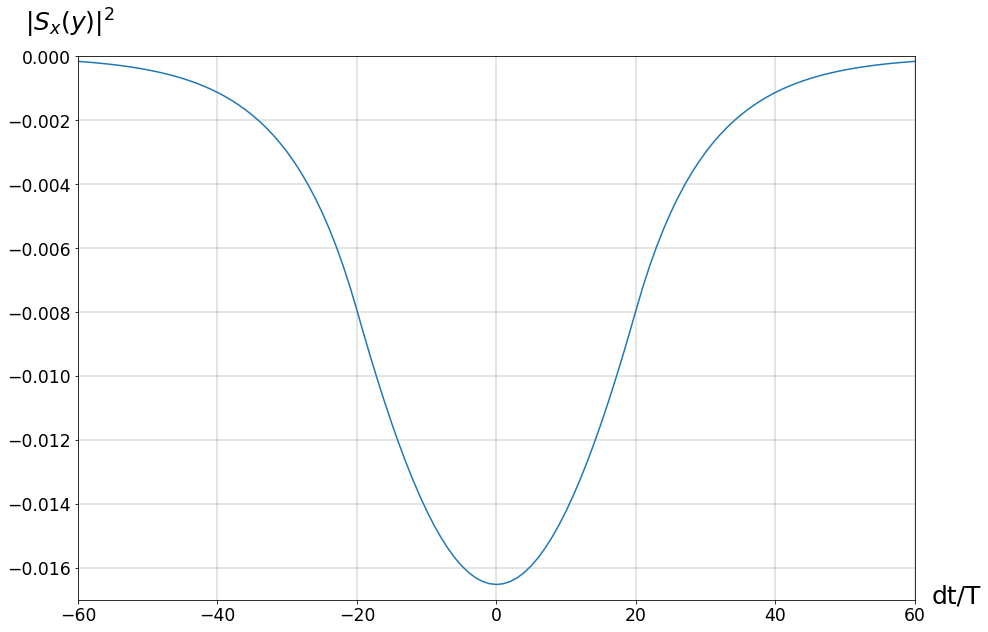

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
SxFull = np.asarray(SxFull, dtype=float)
tlist = np.linspace(0, 124.5, int(tn/20))
fig, ax = plt.subplots(figsize=(15,10))
ax.plot (y, SxFull[1])
ax.set_xlabel('dt/T', rotation=0, fontsize=25, labelpad=20)
ax.set_ylabel('$|S_x(y)|^2$', rotation=0, fontsize=25, labelpad=20)
ax.yaxis.set_label_coords(-0.01, 1.03)
ax.xaxis.set_label_coords(1.05, 0.03)
ax.grid(color='black', linestyle='-', linewidth=0.2)
#ax.set_yticks([-500, -400, -300, -200, -100, -20, 0, 20, 100, 200, 300])
ax.set_ylim(bottom=-0.017, top=0.)
ax.set_xlim(left=-60, right=60)
#ax.xaxis.set_major_locator(MultipleLocator(25))
#ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.tick_params(labelsize='xx-large')
plt.show()
fig.savefig('DensitySx1.png', dpi=170)
#plt.xlim(0, 1000)

In [3]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
PsiFull=np.asarray(PsiFull, dtype=float)
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
M=ystep
N=tn
XB = np.linspace(0,M,M-1)
YB = np.linspace(0,N,N-1)
X,Y = np.meshgrid(XB,YB)
Z = PsiFull
ax.view_init(45, 30) #поворот графика 
surf = ax.plot_surface(X, Y, Z, cmap='jet', linewidth=0)  
fig.colorbar(surf, shrink=1, aspect=10)
plt.show()
fig.savefig('MapMatrix3D.png', dpi=400)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

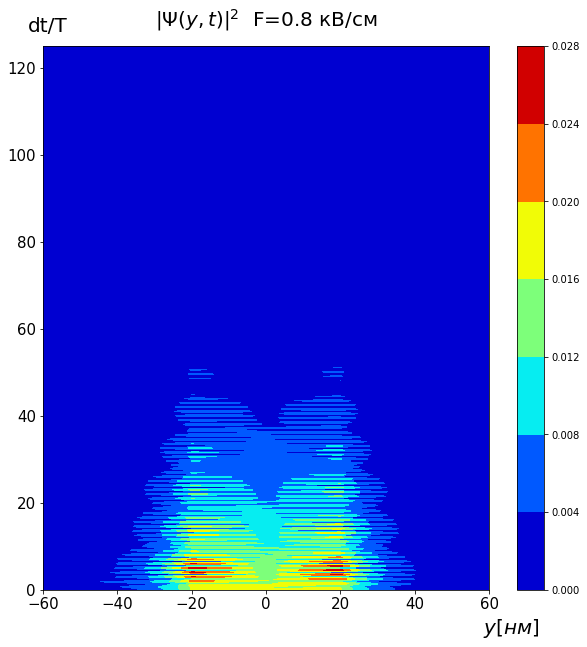

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
M=ystep
N=tn
XB = np.linspace(-60,60,M)
YB = np.linspace(0,125,N)
X,Y = np.meshgrid(XB,YB)
Z = PsiFull
fig,ax=plt.subplots(1, 1, figsize=(10, 10))
cp = ax.contourf(X, Y, Z, cmap='jet')
#fig.colorbar(cp)
fig.colorbar(cp)
# Add a colorbar to a plot
#ax.set_xticks([-60, -40, -20, 0, 20, 40, 60])
F1=0.01*int(F)
ax.set_title('$|Ψ(y,t)|^2$'+'  '+'F=' + str(F1) + ' кВ/см', fontsize=20, pad=20) #$|Sx|^2$
ax.set_ylabel('dt/T', rotation=0, fontsize=20, labelpad=20)
ax.set_xlabel('$y  [нм]$', rotation=0, fontsize=20, labelpad=20)
ax.tick_params(labelsize=15)
ax.yaxis.set_label_coords(0.01, 1.02)
ax.xaxis.set_label_coords(1.05, -0.05)
#ax.set_xlabel('x (cm)')
plt.show()
fig.savefig('MapMatrix2DPsi' + '_' + F +'.png', dpi=400)

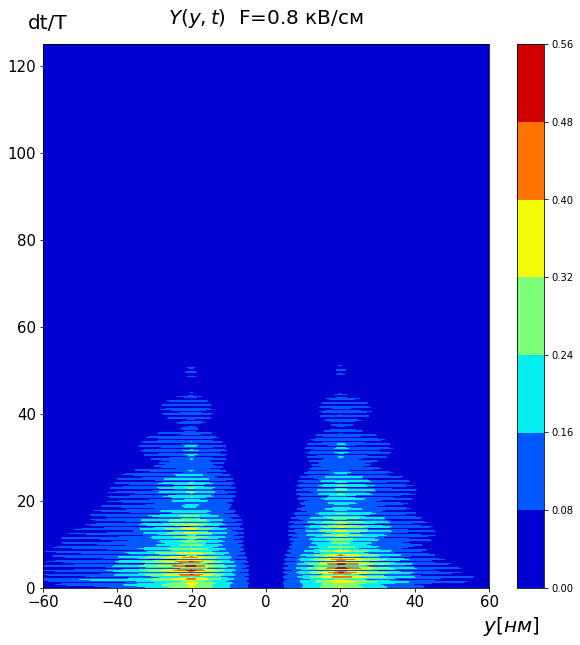

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
M=ystep
N=tn
XB = np.linspace(-60,60,M)
YB = np.linspace(0,125,N)
X,Y = np.meshgrid(XB,YB)
Z = AbsY2Full
fig,ax=plt.subplots(1, 1, figsize=(10, 10))
cp = ax.contourf(X, Y, Z, cmap='jet')
#fig.colorbar(cp)
fig.colorbar(cp)
# Add a colorbar to a plot
#ax.set_xticks([-60, -40, -20, 0, 20, 40, 60])
F1=0.01*int(F)
ax.set_title('$Y(y,t)$'+'  '+'F=' + str(F1) + ' кВ/см', fontsize=20, pad=20) #$|Sx|^2$
ax.set_ylabel('dt/T', rotation=0, fontsize=20, labelpad=20)
ax.set_xlabel('$y  [нм]$', rotation=0, fontsize=20, labelpad=20)
ax.tick_params(labelsize=15)
ax.yaxis.set_label_coords(0.01, 1.02)
ax.xaxis.set_label_coords(1.05, -0.05)
#ax.set_xlabel('x (cm)')
plt.show()
fig.savefig('MapMatrix2DY' + '_' + F +'.png', dpi=400)

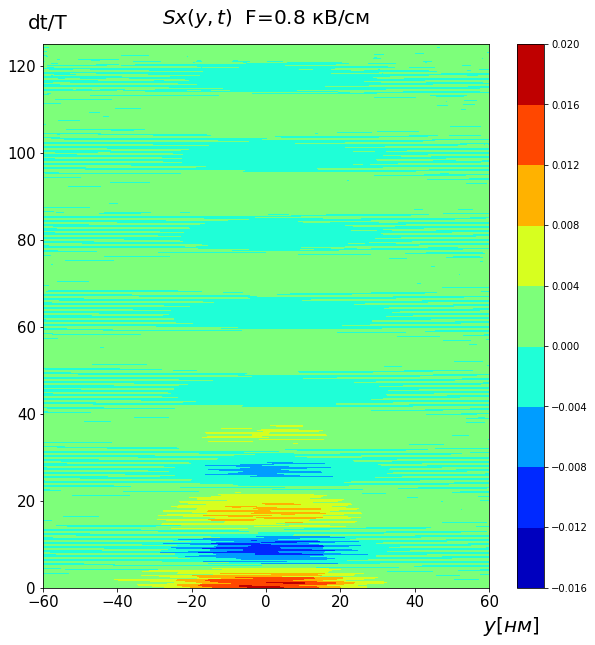

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
M=ystep
N=tn
XB = np.linspace(-60,60,M)
YB = np.linspace(0,125,N)
X,Y = np.meshgrid(XB,YB)
Z = SxFull
fig,ax=plt.subplots(1, 1, figsize=(10, 10))
cp = ax.contourf(X, Y, Z, cmap='jet')
#fig.colorbar(cp)
fig.colorbar(cp)
# Add a colorbar to a plot
#ax.set_xticks([-60, -40, -20, 0, 20, 40, 60])
F1=0.01*int(F)
ax.set_title('$Sx(y,t)$'+'  '+'F=' + str(F1) + ' кВ/см', fontsize=20, pad=20) #$|Sx|^2$
ax.set_ylabel('dt/T', rotation=0, fontsize=20, labelpad=20)
ax.set_xlabel('$y  [нм]$', rotation=0, fontsize=20, labelpad=20)
ax.tick_params(labelsize=15)
ax.yaxis.set_label_coords(0.01, 1.02)
ax.xaxis.set_label_coords(1.05, -0.05)
#ax.set_xlabel('x (cm)')
plt.show()
fig.savefig('MapMatrix2DSx' + '_' + F +'.png', dpi=400)

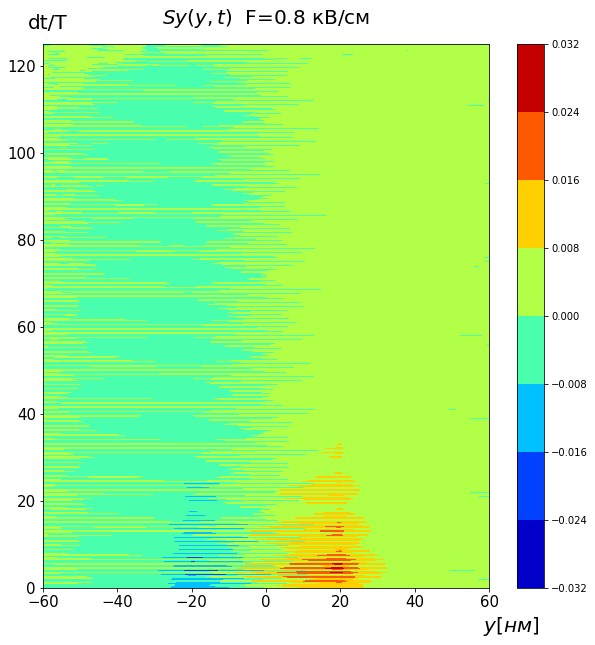

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
M=ystep
N=tn
XB = np.linspace(-60,60,M)
YB = np.linspace(0,125,N)
X,Y = np.meshgrid(XB,YB)
Z = SyFull
fig,ax=plt.subplots(1, 1, figsize=(10, 10))
cp = ax.contourf(X, Y, Z, cmap='jet')
#fig.colorbar(cp)
fig.colorbar(cp)
# Add a colorbar to a plot
#ax.set_xticks([-60, -40, -20, 0, 20, 40, 60])
F1=0.01*int(F)
ax.set_title('$Sy(y,t)$'+'  '+'F=' + str(F1) + ' кВ/см', fontsize=20, pad=20) #$|Sx|^2$
ax.set_ylabel('dt/T', rotation=0, fontsize=20, labelpad=20)
ax.set_xlabel('$y  [нм]$', rotation=0, fontsize=20, labelpad=20)
ax.tick_params(labelsize=15)
ax.yaxis.set_label_coords(0.01, 1.02)
ax.xaxis.set_label_coords(1.05, -0.05)
#ax.set_xlabel('x (cm)')
plt.show()
fig.savefig('MapMatrix2DSy' + '_' + F +'.png', dpi=400)

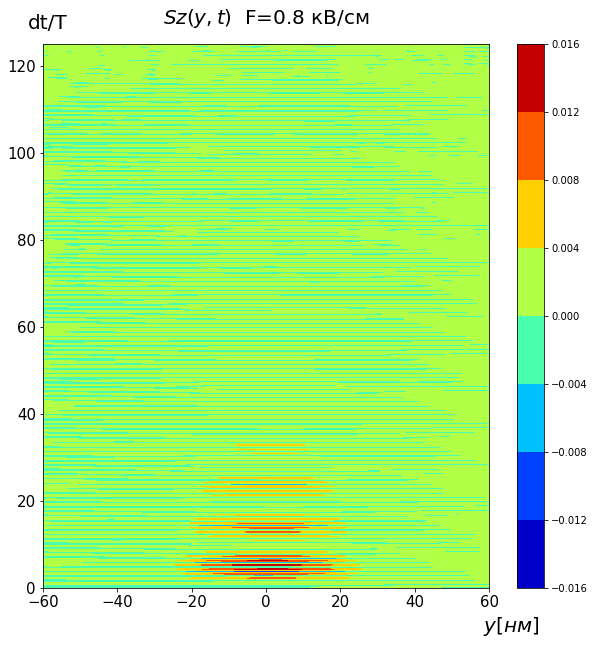

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
M=ystep
N=tn
XB = np.linspace(-60,60,M)
YB = np.linspace(0,125,N)
X,Y = np.meshgrid(XB,YB)
Z = SzFull
fig,ax=plt.subplots(1, 1, figsize=(10, 10))
cp = ax.contourf(X, Y, Z, cmap='jet')
#fig.colorbar(cp)
fig.colorbar(cp)
# Add a colorbar to a plot
#ax.set_xticks([-60, -40, -20, 0, 20, 40, 60])
F1=0.01*int(F)
ax.set_title('$Sz(y,t)$'+'  '+'F=' + str(F1) + ' кВ/см', fontsize=20, pad=20) #$|Sx|^2$
ax.set_ylabel('dt/T', rotation=0, fontsize=20, labelpad=20)
ax.set_xlabel('$y  [нм]$', rotation=0, fontsize=20, labelpad=20)
ax.tick_params(labelsize=15)
ax.yaxis.set_label_coords(0.01, 1.02)
ax.xaxis.set_label_coords(1.05, -0.05)
#ax.set_xlabel('x (cm)')
plt.show()
fig.savefig('MapMatrix2DSz' + '_' + F +'.png', dpi=400)